<a href="https://colab.research.google.com/github/cdong22ucla/lab0113/blob/main/0217lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/CLV.csv")

In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop(["Unnamed: 0", "Customer Lifetime Value"], axis = 1)
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()
params = {
    "hidden_layer_sizes": [(10,), (20,5,), (10,100,5,), (50,100,25,5,)], 
    "activation" : ['relu','logistic'],
    'alpha': [0.0001, 0.01]
}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5)
grid_model = grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 25, 5)}
0.11557368280122134


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(50, 100, 25, 5))

In [ ]:
p_dict = {
    "hidden_layer_sizes": [(50, 100, 25, 5)], 
    "activation" : ['relu'],
    'alpha': [0.01]
}

MLPRegressor(**p_dict)

MLPRegressor(activation=['relu'], alpha=[0.01],
             hidden_layer_sizes=[(50, 100, 25, 5)])

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error
# calculate in-sample MSE
y_pred_in = grid_model.predict(X_train)
mean_squared_error(y_train,y_pred_in)

39850533.9292697

In [ ]:
# calculate out-of-sample MSE
y_pred_out = grid_model.predict(X_test)
mean_squared_error(y_test,y_pred_out)

48337140.87108806

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="softmax"))

In [ ]:
model.compile (loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 108984296.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 108984336.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 108984304.0000
Epoch 4/100
200/200 [==============================] - 1s 2ms/step - loss: 108984336.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 108984288.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 108984264.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 108984360.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 108984320.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 108984304.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 108984304.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 108984304.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


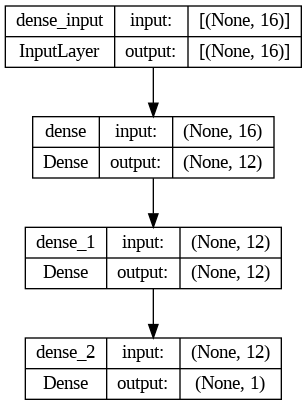

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=9eb773ab9533e728def8670d377e8ffa69b334e9b667f43e35cd3495063b67e4
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = 'CLV NN Viz', filename = "/content/gdrive/MyDrive/441B/nn_model.gz")

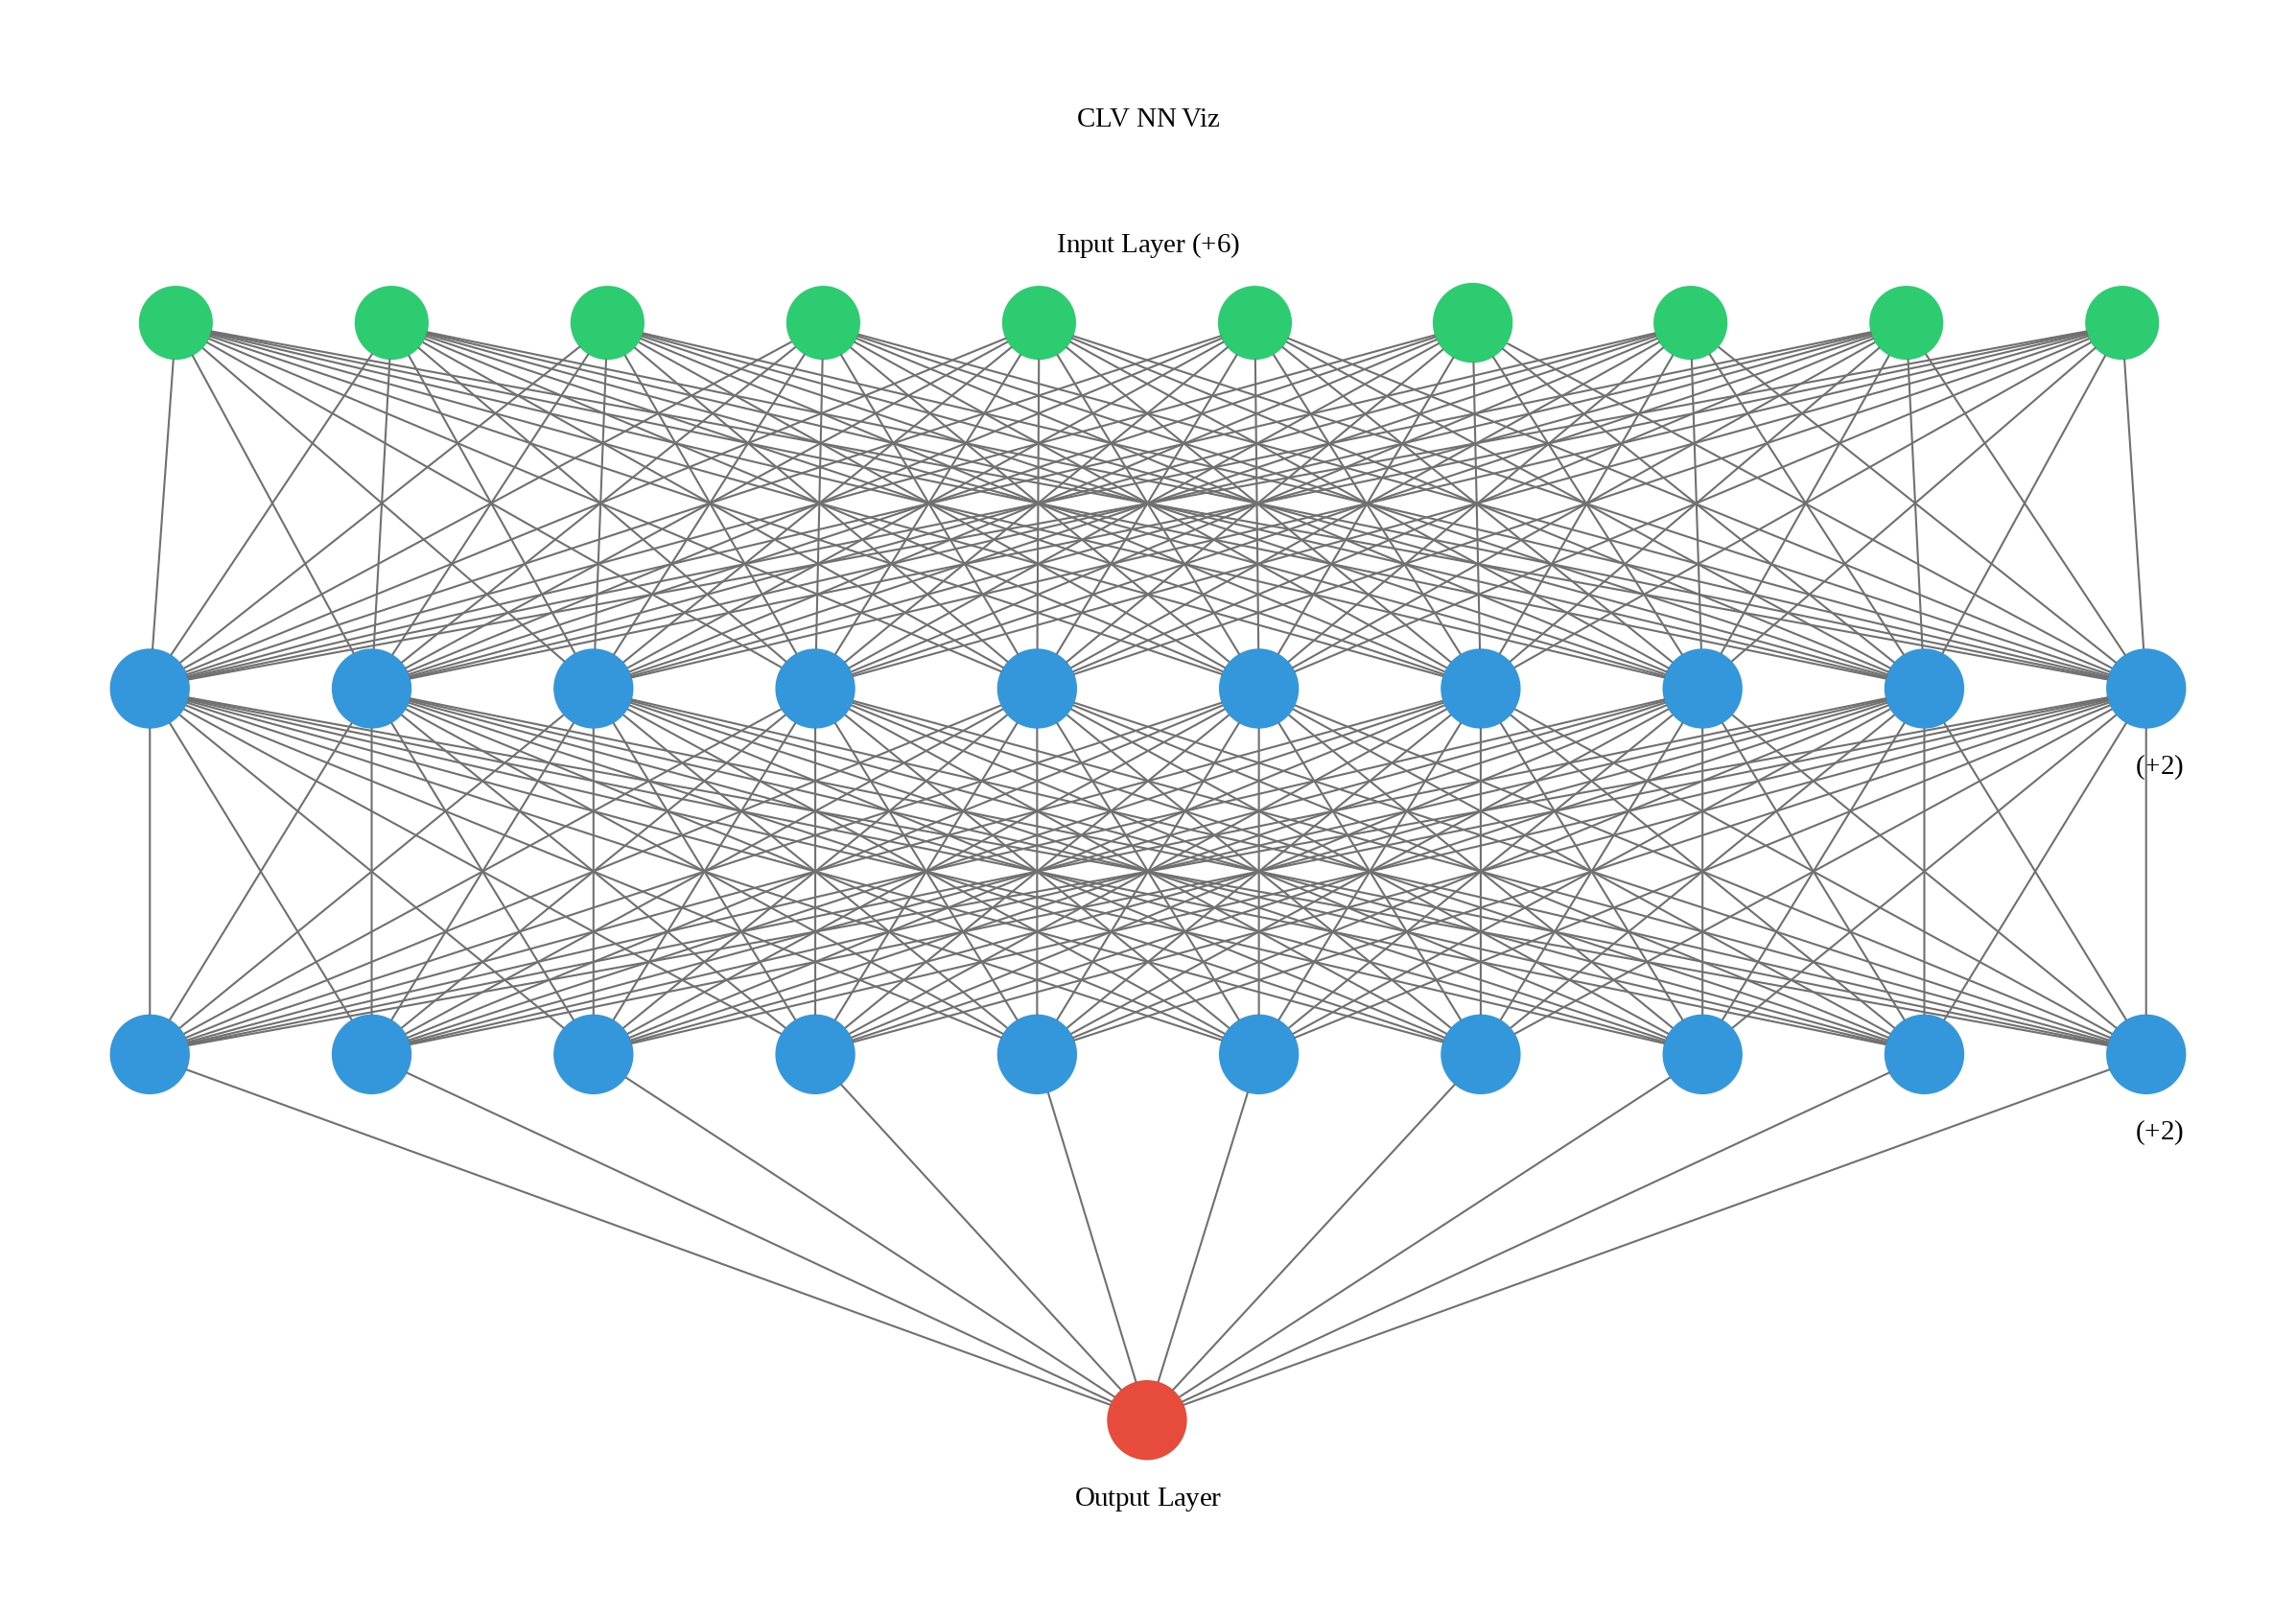